# Workshop - Network Analysis

In [1]:
# For reading, and transforming data
import pandas as pd 

# For creating network graphs 
import networkx as nx

# To use shortest path and clique-finding algorithms 
from networkx.algorithms import approximation

# For basic mathematical calculations
import math 


# For visualising our networks
import matplotlib.pyplot as plt

# Specifically, for interactive visualisations
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.offline import plot as offpy

In [2]:
cd

C:\Users\Decoded


In [3]:
enron = pd.read_csv('enron_emails.csv')

In [4]:
enron.head()

,from,to
0,greg.whalley,k..allen
1,louise.kitchen,k..allen
2,louise.kitchen,k..allen
3,errol.mclaughlin,john.arnold
4,mike.grigsby,john.arnold


In [5]:
g = nx.from_pandas_edgelist(df = enron, source = 'from', target = 'to', create_using = nx.DiGraph())

In [6]:
g

In [7]:
list(g.nodes())

['greg.whalley',
 'k..allen',
 'louise.kitchen',
 'errol.mclaughlin',
 'john.arnold',
 'mike.grigsby',
 'john.griffith',
 'dutch.quigley',
 's..shively',
 'richard.shapiro',
 'harry.arora',
 'sally.beck',
 'matthew.lenhart',
 'eric.bass',
 'a..martin',
 'm..love',
 'monique.sanchez',
 'charles.weldon',
 'jeff.king',
 'don.baughman',
 'w..delainey',
 'w..white',
 'rod.hayslett',
 'rick.buy',
 'm..presto',
 'robert.benson',
 'dana.davis',
 'joe.quenet',
 'susan.scott',
 'michelle.lokay',
 'lynn.blair',
 'lindy.donoho',
 'shelley.corman',
 'kimberly.watson',
 'bill.rapp',
 'scott.neal',
 'f..brawner',
 'jim.schwieger',
 'vladi.pimenov',
 'andrea.ring',
 'l..mims',
 'j.kaminski',
 'j..kean',
 'a..shankman',
 'stanley.horton',
 'kenneth.lay',
 'f..campbell',
 'joe.stepenovitch',
 'd..thomas',
 'mike.carson',
 'eric.saibi',
 'j..sturm',
 'michelle.cash',
 'teb.lokey',
 'tracy.geaccone',
 'kevin.hyatt',
 'darrell.schoolcraft',
 'd..steffes',
 'cara.semperger',
 'sean.crandall',
 'cooper.riche

In [8]:
list(g.edges())

[('greg.whalley', 'k..allen'),
 ('greg.whalley', 'rick.buy'),
 ('k..allen', 'keith.holst'),
 ('k..allen', 'kam.keiser'),
 ('k..allen', 'lavorato'),
 ('k..allen', 'h..lewis'),
 ('k..allen', 'a..martin'),
 ('k..allen', 'scott.neal'),
 ('k..allen', 'dutch.quigley'),
 ('k..allen', 'greg.whalley'),
 ('louise.kitchen', 'k..allen'),
 ('louise.kitchen', 'john.arnold'),
 ('louise.kitchen', 'harry.arora'),
 ('louise.kitchen', 'sally.beck'),
 ('louise.kitchen', 'robert.benson'),
 ('louise.kitchen', 'f..brawner'),
 ('louise.kitchen', 'rick.buy'),
 ('louise.kitchen', 'mike.carson'),
 ('louise.kitchen', 'doug.gilbert-smith'),
 ('louise.kitchen', 'mike.grigsby'),
 ('louise.kitchen', 'e..haedicke'),
 ('louise.kitchen', 'lavorato'),
 ('louise.kitchen', 'a..martin'),
 ('louise.kitchen', 'larry.may'),
 ('louise.kitchen', 'l..mims'),
 ('louise.kitchen', 'scott.neal'),
 ('louise.kitchen', 'gerald.nemec'),
 ('louise.kitchen', 'm..presto'),
 ('louise.kitchen', 'elizabeth.sager'),
 ('louise.kitchen', 'sara.sh

In [9]:
nx.is_directed(g)

True

In [10]:
nx.is_weighted(g)

False

In [11]:
list(g.degree())

[('greg.whalley', 18),
 ('k..allen', 10),
 ('louise.kitchen', 31),
 ('errol.mclaughlin', 11),
 ('john.arnold', 14),
 ('mike.grigsby', 28),
 ('john.griffith', 8),
 ('dutch.quigley', 10),
 ('s..shively', 16),
 ('richard.shapiro', 10),
 ('harry.arora', 5),
 ('sally.beck', 23),
 ('matthew.lenhart', 9),
 ('eric.bass', 11),
 ('a..martin', 20),
 ('m..love', 12),
 ('monique.sanchez', 14),
 ('charles.weldon', 6),
 ('jeff.king', 3),
 ('don.baughman', 6),
 ('w..delainey', 6),
 ('w..white', 14),
 ('rod.hayslett', 17),
 ('rick.buy', 14),
 ('m..presto', 13),
 ('robert.benson', 6),
 ('dana.davis', 3),
 ('joe.quenet', 1),
 ('susan.scott', 13),
 ('michelle.lokay', 16),
 ('lynn.blair', 13),
 ('lindy.donoho', 22),
 ('shelley.corman', 18),
 ('kimberly.watson', 21),
 ('bill.rapp', 14),
 ('scott.neal', 20),
 ('f..brawner', 8),
 ('jim.schwieger', 7),
 ('vladi.pimenov', 9),
 ('andrea.ring', 2),
 ('l..mims', 7),
 ('j.kaminski', 4),
 ('j..kean', 11),
 ('a..shankman', 6),
 ('stanley.horton', 11),
 ('kenneth.lay'

In [12]:
list(g.in_degree())

[('greg.whalley', 16),
 ('k..allen', 2),
 ('louise.kitchen', 2),
 ('errol.mclaughlin', 5),
 ('john.arnold', 6),
 ('mike.grigsby', 6),
 ('john.griffith', 0),
 ('dutch.quigley', 6),
 ('s..shively', 8),
 ('richard.shapiro', 2),
 ('harry.arora', 3),
 ('sally.beck', 5),
 ('matthew.lenhart', 1),
 ('eric.bass', 5),
 ('a..martin', 16),
 ('m..love', 3),
 ('monique.sanchez', 3),
 ('charles.weldon', 2),
 ('jeff.king', 1),
 ('don.baughman', 1),
 ('w..delainey', 1),
 ('w..white', 6),
 ('rod.hayslett', 7),
 ('rick.buy', 10),
 ('m..presto', 1),
 ('robert.benson', 6),
 ('dana.davis', 0),
 ('joe.quenet', 0),
 ('susan.scott', 8),
 ('michelle.lokay', 5),
 ('lynn.blair', 5),
 ('lindy.donoho', 14),
 ('shelley.corman', 11),
 ('kimberly.watson', 11),
 ('bill.rapp', 8),
 ('scott.neal', 10),
 ('f..brawner', 6),
 ('jim.schwieger', 0),
 ('vladi.pimenov', 7),
 ('andrea.ring', 1),
 ('l..mims', 4),
 ('j.kaminski', 1),
 ('j..kean', 3),
 ('a..shankman', 0),
 ('stanley.horton', 2),
 ('kenneth.lay', 14),
 ('f..campbell

In [13]:
list(g.out_degree())

[('greg.whalley', 2),
 ('k..allen', 8),
 ('louise.kitchen', 29),
 ('errol.mclaughlin', 6),
 ('john.arnold', 8),
 ('mike.grigsby', 22),
 ('john.griffith', 8),
 ('dutch.quigley', 4),
 ('s..shively', 8),
 ('richard.shapiro', 8),
 ('harry.arora', 2),
 ('sally.beck', 18),
 ('matthew.lenhart', 8),
 ('eric.bass', 6),
 ('a..martin', 4),
 ('m..love', 9),
 ('monique.sanchez', 11),
 ('charles.weldon', 4),
 ('jeff.king', 2),
 ('don.baughman', 5),
 ('w..delainey', 5),
 ('w..white', 8),
 ('rod.hayslett', 10),
 ('rick.buy', 4),
 ('m..presto', 12),
 ('robert.benson', 0),
 ('dana.davis', 3),
 ('joe.quenet', 1),
 ('susan.scott', 5),
 ('michelle.lokay', 11),
 ('lynn.blair', 8),
 ('lindy.donoho', 8),
 ('shelley.corman', 7),
 ('kimberly.watson', 10),
 ('bill.rapp', 6),
 ('scott.neal', 10),
 ('f..brawner', 2),
 ('jim.schwieger', 7),
 ('vladi.pimenov', 2),
 ('andrea.ring', 1),
 ('l..mims', 3),
 ('j.kaminski', 3),
 ('j..kean', 8),
 ('a..shankman', 6),
 ('stanley.horton', 9),
 ('kenneth.lay', 5),
 ('f..campbel

In [14]:
g.number_of_edges(u = 'greg.whalley', v = 'louise.kitchen')

0

In [15]:
list(g.successors('louise.kitchen'))

['k..allen',
 'john.arnold',
 'harry.arora',
 'sally.beck',
 'robert.benson',
 'f..brawner',
 'rick.buy',
 'mike.carson',
 'doug.gilbert-smith',
 'mike.grigsby',
 'e..haedicke',
 'lavorato',
 'a..martin',
 'larry.may',
 'l..mims',
 'scott.neal',
 'gerald.nemec',
 'm..presto',
 'elizabeth.sager',
 'sara.shackleton',
 's..shively',
 'd..steffes',
 'geoff.storey',
 'mike.swerzbin',
 'legal <.taylor@',
 'barry.tycholiz',
 'greg.whalley',
 'w..white',
 'andy.zipper']

In [16]:
list(g.predecessors('louise.kitchen'))

['sally.beck', 'm..presto']

In [17]:
nx.shortest_path(g, source = 'greg.whalley', target = 'louise.kitchen')

['greg.whalley', 'rick.buy', 'sally.beck', 'louise.kitchen']

In [18]:
nx.shortest_path(g, source = 'greg.whalley', target = 'kenneth.lay')

['greg.whalley', 'rick.buy', 'kenneth.lay']

In [19]:
nx.shortest_path(g, target = 'kenneth.lay')

{'kenneth.lay': ['kenneth.lay'],
 'james.derrick': ['james.derrick', 'kenneth.lay'],
 'stanley.horton': ['stanley.horton', 'kenneth.lay'],
 'j..kean': ['j..kean', 'kenneth.lay'],
 'tom.donohoe': ['tom.donohoe', 'kenneth.lay'],
 'w..pereira': ['w..pereira', 'kenneth.lay'],
 'richard.shapiro': ['richard.shapiro', 'kenneth.lay'],
 'rick.buy': ['rick.buy', 'kenneth.lay'],
 'a..shankman': ['a..shankman', 'kenneth.lay'],
 'kevin.hyatt': ['kevin.hyatt', 'kenneth.lay'],
 'jim.schwieger': ['jim.schwieger', 'kenneth.lay'],
 'sally.beck': ['sally.beck', 'kenneth.lay'],
 'benjamin.rogers': ['benjamin.rogers', 'kenneth.lay'],
 'danny.mccarty': ['danny.mccarty', 'kenneth.lay'],
 'w..delainey': ['w..delainey', 'kenneth.lay'],
 'michelle.cash': ['michelle.cash', 'james.derrick', 'kenneth.lay'],
 'rod.hayslett': ['rod.hayslett', 'stanley.horton', 'kenneth.lay'],
 'lynn.blair': ['lynn.blair', 'stanley.horton', 'kenneth.lay'],
 'jeff.dasovich': ['jeff.dasovich', 'j..kean', 'kenneth.lay'],
 'chris.germany

In [20]:
nx.degree_centrality(g)

{'greg.whalley': 0.13846153846153847,
 'k..allen': 0.07692307692307693,
 'louise.kitchen': 0.23846153846153847,
 'errol.mclaughlin': 0.08461538461538462,
 'john.arnold': 0.1076923076923077,
 'mike.grigsby': 0.2153846153846154,
 'john.griffith': 0.06153846153846154,
 'dutch.quigley': 0.07692307692307693,
 's..shively': 0.12307692307692308,
 'richard.shapiro': 0.07692307692307693,
 'harry.arora': 0.038461538461538464,
 'sally.beck': 0.17692307692307693,
 'matthew.lenhart': 0.06923076923076923,
 'eric.bass': 0.08461538461538462,
 'a..martin': 0.15384615384615385,
 'm..love': 0.09230769230769231,
 'monique.sanchez': 0.1076923076923077,
 'charles.weldon': 0.046153846153846156,
 'jeff.king': 0.023076923076923078,
 'don.baughman': 0.046153846153846156,
 'w..delainey': 0.046153846153846156,
 'w..white': 0.1076923076923077,
 'rod.hayslett': 0.13076923076923078,
 'rick.buy': 0.1076923076923077,
 'm..presto': 0.1,
 'robert.benson': 0.046153846153846156,
 'dana.davis': 0.023076923076923078,
 'joe.

In [21]:
nx.betweenness_centrality(g)

{'greg.whalley': 0.0428123827538389,
 'k..allen': 0.023333275913776805,
 'louise.kitchen': 0.037618216628066636,
 'errol.mclaughlin': 0.023897142743296587,
 'john.arnold': 0.011336949011367616,
 'mike.grigsby': 0.08357457510792202,
 'john.griffith': 0.0,
 'dutch.quigley': 0.01733314358695817,
 's..shively': 0.022325325161839396,
 'richard.shapiro': 0.0061151452072740085,
 'harry.arora': 0.0035523604799096767,
 'sally.beck': 0.11891229150439925,
 'matthew.lenhart': 0.0003538550497405596,
 'eric.bass': 0.03501994163815639,
 'a..martin': 0.045218671150039094,
 'm..love': 0.022745404139627237,
 'monique.sanchez': 0.007979007674893185,
 'charles.weldon': 0.0013905216230797627,
 'jeff.king': 0.007052275889485191,
 'don.baughman': 0.001148876962830451,
 'w..delainey': 0.01916126724266259,
 'w..white': 0.05747749719505868,
 'rod.hayslett': 0.05048431104694472,
 'rick.buy': 0.039135776305423566,
 'm..presto': 0.0009652993899796852,
 'robert.benson': 0.0,
 'dana.davis': 0.0,
 'joe.quenet': 0.0,


In [22]:
nx.eigenvector_centrality(g)

{'greg.whalley': 0.03091903378599063,
 'k..allen': 0.005364228599776185,
 'louise.kitchen': 0.005086344987771196,
 'errol.mclaughlin': 0.0034935226834277677,
 'john.arnold': 0.0041723373291970255,
 'mike.grigsby': 0.0074216998380423034,
 'john.griffith': 1.4900241810625916e-31,
 'dutch.quigley': 0.0028683961653446647,
 's..shively': 0.009128320578303342,
 'richard.shapiro': 0.0012231078983554438,
 'harry.arora': 0.00591351283690085,
 'sally.beck': 0.03338358636133063,
 'matthew.lenhart': 0.0011059860990820802,
 'eric.bass': 0.003680171931131725,
 'a..martin': 0.017422430971664463,
 'm..love': 0.0024778630768450905,
 'monique.sanchez': 0.0018569047203935403,
 'charles.weldon': 0.0018315565837054343,
 'jeff.king': 0.0004316622994654698,
 'don.baughman': 6.433443490972477e-05,
 'w..delainey': 0.0007984986911700113,
 'w..white': 0.008611527045224353,
 'rod.hayslett': 0.1811749175860459,
 'rick.buy': 0.02841197314012276,
 'm..presto': 0.0007577625532725664,
 'robert.benson': 0.0028925675362

In [23]:
nx.density(g)

0.037345860246623605

In [24]:
approximation.max_clique(g)

{'legal <.taylor@',
 'marie.heard',
 'sara.shackleton',
 'stephanie.panus',
 'tana.jones'}

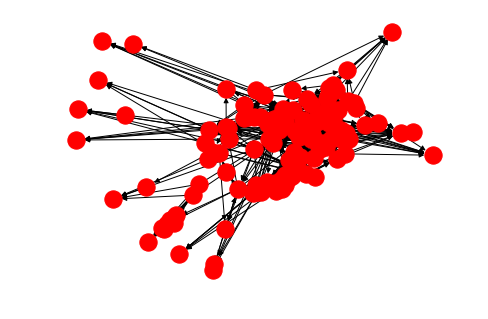

In [25]:
nx.draw(g)

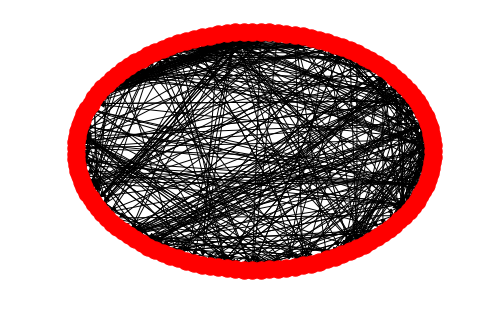

In [26]:
nx.draw_circular(g)

In [27]:
names_df = pd.DataFrame(list(g.nodes()), columns=['Name'])
names_map = names_df['Name'].to_dict()

index_tuples = []

for i in range(len(list(g.edges()))):
    index_tuples.append((list(names_map.values()).index(list(g.edges())[i][0]), 
                         list(names_map.values()).index(list(g.edges())[i][1])))

In [29]:
index_tuples

[(0, 1),
 (0, 23),
 (1, 107),
 (1, 82),
 (1, 111),
 (1, 115),
 (1, 14),
 (1, 35),
 (1, 7),
 (1, 0),
 (2, 1),
 (2, 4),
 (2, 10),
 (2, 11),
 (2, 25),
 (2, 36),
 (2, 23),
 (2, 49),
 (2, 72),
 (2, 5),
 (2, 95),
 (2, 111),
 (2, 14),
 (2, 118),
 (2, 40),
 (2, 35),
 (2, 97),
 (2, 24),
 (2, 102),
 (2, 99),
 (2, 8),
 (2, 57),
 (2, 128),
 (2, 108),
 (2, 96),
 (2, 65),
 (2, 0),
 (2, 21),
 (2, 120),
 (3, 4),
 (3, 82),
 (3, 117),
 (3, 118),
 (3, 7),
 (3, 120),
 (4, 109),
 (4, 111),
 (4, 117),
 (4, 118),
 (4, 3),
 (4, 7),
 (4, 129),
 (4, 120),
 (5, 4),
 (5, 81),
 (5, 86),
 (5, 92),
 (5, 107),
 (5, 82),
 (5, 110),
 (5, 111),
 (5, 12),
 (5, 14),
 (5, 63),
 (5, 38),
 (5, 84),
 (5, 16),
 (5, 28),
 (5, 8),
 (5, 127),
 (5, 51),
 (5, 108),
 (5, 65),
 (5, 129),
 (5, 85),
 (6, 4),
 (6, 109),
 (6, 117),
 (6, 118),
 (6, 103),
 (6, 38),
 (6, 7),
 (6, 120),
 (7, 4),
 (7, 117),
 (7, 3),
 (7, 28),
 (8, 4),
 (8, 94),
 (8, 92),
 (8, 111),
 (8, 14),
 (8, 40),
 (8, 35),
 (8, 128),
 (9, 10),
 (9, 64),
 (9, 42),
 (9, 11

In [34]:
positions = nx.spring_layout(g, dim = 3, seed = 42)
pos_list = list(positions.values())
pos_list

[array([-0.10649361, -0.19072007, -0.02776381]),
 array([-0.21330586, -0.21059693, -0.05238314]),
 array([ 0.0204179 , -0.03792283, -0.04729761]),
 array([-0.11149187, -0.02083693,  0.00534785]),
 array([-0.14730074, -0.06345603,  0.08674273]),
 array([-0.10529077,  0.00804115,  0.21423898]),
 array([ 0.04047481, -0.11134169, -0.14498209]),
 array([-0.10940016,  0.09051011,  0.03337424]),
 array([ 0.01802192,  0.00059227, -0.10994647]),
 array([ 0.05456748, -0.2939748 , -0.16784052]),
 array([-0.01906044, -0.01232047, -0.08192581]),
 array([-0.04580203, -0.10417237,  0.04586446]),
 array([0.03364046, 0.12948788, 0.40798643]),
 array([-0.04817193, -0.02253204,  0.0869115 ]),
 array([-0.19170199, -0.23127967, -0.11974738]),
 array([0.10410627, 0.14734585, 0.0182863 ]),
 array([0.09576312, 0.0264842 , 0.13375047]),
 array([0.06688183, 0.02472153, 0.35787435]),
 array([-0.02178627,  0.01113084,  0.06486844]),
 array([-0.11241035,  0.04892505,  0.25810223]),
 array([-0.14318995, -0.30480234

In [36]:
nx.set_node_attributes(g, nx.degree_centrality(g), name = 'Degree Centrality')
nx.set_node_attributes(g, nx.betweenness_centrality(g), name = 'Betweenness Centrality')
nx.set_node_attributes(g, nx.eigenvector_centrality(g), name = 'Eigenvector Centrality')
nx.set_node_attributes(g, nx.in_degree_centrality(g), name = 'In-Degree Centrality')

In [39]:
nx.get_node_attributes(g, 'Degree Centrality')

{'greg.whalley': 0.13846153846153847,
 'k..allen': 0.07692307692307693,
 'louise.kitchen': 0.23846153846153847,
 'errol.mclaughlin': 0.08461538461538462,
 'john.arnold': 0.1076923076923077,
 'mike.grigsby': 0.2153846153846154,
 'john.griffith': 0.06153846153846154,
 'dutch.quigley': 0.07692307692307693,
 's..shively': 0.12307692307692308,
 'richard.shapiro': 0.07692307692307693,
 'harry.arora': 0.038461538461538464,
 'sally.beck': 0.17692307692307693,
 'matthew.lenhart': 0.06923076923076923,
 'eric.bass': 0.08461538461538462,
 'a..martin': 0.15384615384615385,
 'm..love': 0.09230769230769231,
 'monique.sanchez': 0.1076923076923077,
 'charles.weldon': 0.046153846153846156,
 'jeff.king': 0.023076923076923078,
 'don.baughman': 0.046153846153846156,
 'w..delainey': 0.046153846153846156,
 'w..white': 0.1076923076923077,
 'rod.hayslett': 0.13076923076923078,
 'rick.buy': 0.1076923076923077,
 'm..presto': 0.1,
 'robert.benson': 0.046153846153846156,
 'dana.davis': 0.023076923076923078,
 'joe.

In [40]:
nx.get_node_attributes(g, 'Betweenness Centrality')

{'greg.whalley': 0.0428123827538389,
 'k..allen': 0.023333275913776805,
 'louise.kitchen': 0.037618216628066636,
 'errol.mclaughlin': 0.023897142743296587,
 'john.arnold': 0.011336949011367616,
 'mike.grigsby': 0.08357457510792202,
 'john.griffith': 0.0,
 'dutch.quigley': 0.01733314358695817,
 's..shively': 0.022325325161839396,
 'richard.shapiro': 0.0061151452072740085,
 'harry.arora': 0.0035523604799096767,
 'sally.beck': 0.11891229150439925,
 'matthew.lenhart': 0.0003538550497405596,
 'eric.bass': 0.03501994163815639,
 'a..martin': 0.045218671150039094,
 'm..love': 0.022745404139627237,
 'monique.sanchez': 0.007979007674893185,
 'charles.weldon': 0.0013905216230797627,
 'jeff.king': 0.007052275889485191,
 'don.baughman': 0.001148876962830451,
 'w..delainey': 0.01916126724266259,
 'w..white': 0.05747749719505868,
 'rod.hayslett': 0.05048431104694472,
 'rick.buy': 0.039135776305423566,
 'm..presto': 0.0009652993899796852,
 'robert.benson': 0.0,
 'dana.davis': 0.0,
 'joe.quenet': 0.0,


In [41]:
nx.get_node_attributes(g, 'Eigenvector Centrality')

{'greg.whalley': 0.03091903378599063,
 'k..allen': 0.005364228599776185,
 'louise.kitchen': 0.005086344987771196,
 'errol.mclaughlin': 0.0034935226834277677,
 'john.arnold': 0.0041723373291970255,
 'mike.grigsby': 0.0074216998380423034,
 'john.griffith': 1.4900241810625916e-31,
 'dutch.quigley': 0.0028683961653446647,
 's..shively': 0.009128320578303342,
 'richard.shapiro': 0.0012231078983554438,
 'harry.arora': 0.00591351283690085,
 'sally.beck': 0.03338358636133063,
 'matthew.lenhart': 0.0011059860990820802,
 'eric.bass': 0.003680171931131725,
 'a..martin': 0.017422430971664463,
 'm..love': 0.0024778630768450905,
 'monique.sanchez': 0.0018569047203935403,
 'charles.weldon': 0.0018315565837054343,
 'jeff.king': 0.0004316622994654698,
 'don.baughman': 6.433443490972477e-05,
 'w..delainey': 0.0007984986911700113,
 'w..white': 0.008611527045224353,
 'rod.hayslett': 0.1811749175860459,
 'rick.buy': 0.02841197314012276,
 'm..presto': 0.0007577625532725664,
 'robert.benson': 0.0028925675362

In [42]:
nx.get_node_attributes(g, 'In-Degree Centrality')

{'greg.whalley': 0.12307692307692308,
 'k..allen': 0.015384615384615385,
 'louise.kitchen': 0.015384615384615385,
 'errol.mclaughlin': 0.038461538461538464,
 'john.arnold': 0.046153846153846156,
 'mike.grigsby': 0.046153846153846156,
 'john.griffith': 0.0,
 'dutch.quigley': 0.046153846153846156,
 's..shively': 0.06153846153846154,
 'richard.shapiro': 0.015384615384615385,
 'harry.arora': 0.023076923076923078,
 'sally.beck': 0.038461538461538464,
 'matthew.lenhart': 0.007692307692307693,
 'eric.bass': 0.038461538461538464,
 'a..martin': 0.12307692307692308,
 'm..love': 0.023076923076923078,
 'monique.sanchez': 0.023076923076923078,
 'charles.weldon': 0.015384615384615385,
 'jeff.king': 0.007692307692307693,
 'don.baughman': 0.007692307692307693,
 'w..delainey': 0.007692307692307693,
 'w..white': 0.046153846153846156,
 'rod.hayslett': 0.05384615384615385,
 'rick.buy': 0.07692307692307693,
 'm..presto': 0.007692307692307693,
 'robert.benson': 0.046153846153846156,
 'dana.davis': 0.0,
 'jo

In [43]:
N2=len(g.nodes())

L2=len(g.edges())

Xn=[pos_list[k][0] for k in range(N2)]# x-coordinates of nodes
Yn=[pos_list[k][1] for k in range(N2)]# y-coordinates
Zn=[pos_list[k][2] for k in range(N2)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in index_tuples:
    Xe+=[pos_list[e[0]][0],pos_list[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[pos_list[e[0]][1],pos_list[e[1]][1], None]  
    Ze+=[pos_list[e[0]][2],pos_list[e[1]][2], None]
    
    
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size=[170*x for x in nx.get_node_attributes(g, 'Degree Centrality').values()],
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=list(nx.get_node_attributes(g, 'Degree Centrality').keys()),
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Degree centrality in the Enron employee network",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )
    
data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)

In [47]:
offpy(fig, filename='Enron Emails -- Degree Centrality.html')

'Enron Emails -- Degree Centrality.html'

In [48]:
N2=len(g.nodes())

L2=len(g.edges())

Xn=[pos_list[k][0] for k in range(N2)]# x-coordinates of nodes
Yn=[pos_list[k][1] for k in range(N2)]# y-coordinates
Zn=[pos_list[k][2] for k in range(N2)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in index_tuples:
    Xe+=[pos_list[e[0]][0],pos_list[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[pos_list[e[0]][1],pos_list[e[1]][1], None]  
    Ze+=[pos_list[e[0]][2],pos_list[e[1]][2], None]
    
    
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size=[170*x for x in nx.get_node_attributes(g, 'Betweenness Centrality').values()],
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=list(nx.get_node_attributes(g, 'Betweenness Centrality').keys()),
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Betweenness centrality in the Enron employee network",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )
    
data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)

In [50]:
offpy(fig, filename='Enron Emails -- Betweenness Centrality.html')

'Enron Emails -- Betweenness Centrality.html'

In [51]:
N2=len(g.nodes())

L2=len(g.edges())

Xn=[pos_list[k][0] for k in range(N2)]# x-coordinates of nodes
Yn=[pos_list[k][1] for k in range(N2)]# y-coordinates
Zn=[pos_list[k][2] for k in range(N2)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in index_tuples:
    Xe+=[pos_list[e[0]][0],pos_list[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[pos_list[e[0]][1],pos_list[e[1]][1], None]  
    Ze+=[pos_list[e[0]][2],pos_list[e[1]][2], None]
    
    
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size=[70*x for x in nx.get_node_attributes(g, 'Eigenvector Centrality').values()],
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=list(nx.get_node_attributes(g, 'Eigenvector Centrality').keys()),
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Eigenvector centrality in the Enron employee network",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )
    
data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)


In [52]:
offpy(fig, filename='Enron Emails -- Eigenvector Centrality.html')

'Enron Emails -- Eigenvector Centrality.html'

In [58]:
N2=len(g.nodes())

L2=len(g.edges())

Xn=[pos_list[k][0] for k in range(N2)]# x-coordinates of nodes
Yn=[pos_list[k][1] for k in range(N2)]# y-coordinates
Zn=[pos_list[k][2] for k in range(N2)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in index_tuples:
    Xe+=[pos_list[e[0]][0],pos_list[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[pos_list[e[0]][1],pos_list[e[1]][1], None]  
    Ze+=[pos_list[e[0]][2],pos_list[e[1]][2], None]
    
    
trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='actors',
               marker=dict(symbol='circle',
                             size=[170*x for x in nx.get_node_attributes(g, 'In-degree Centrality').values()],
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               text=list(nx.get_node_attributes(g, 'In-degree Centrality').keys()),
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="In-degree centrality in the Enron employee network",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text="",
            xref='paper',
            yref='paper',
            x=0,
            y=0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ],    )
    
data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)

In [59]:
offpy(fig, filename='Enron Emails -- In-degree Centrality.html')

'Enron Emails -- In-degree Centrality.html'